Buffer Size | Blocking Probability (Theory) | Blocking Probability (Simulation) | Average Elements (Theory) | Average Elements (Simulation) | Average Time (Theory) | Average Time (Simulation)
          1 |                       0.26230 |                           0.26341 |               0.85246 |                     0.44496 |          0.00578 |               0.00302
          5 |                       0.06634 |                           0.06653 |               2.14243 |                     1.87067 |          0.01147 |               0.01002
         10 |                       0.01845 |                           0.01866 |               3.11452 |                     2.96613 |          0.01587 |               0.01511
         15 |                       0.00576 |                           0.00525 |               3.60838 |                     3.49401 |          0.01815 |               0.01756


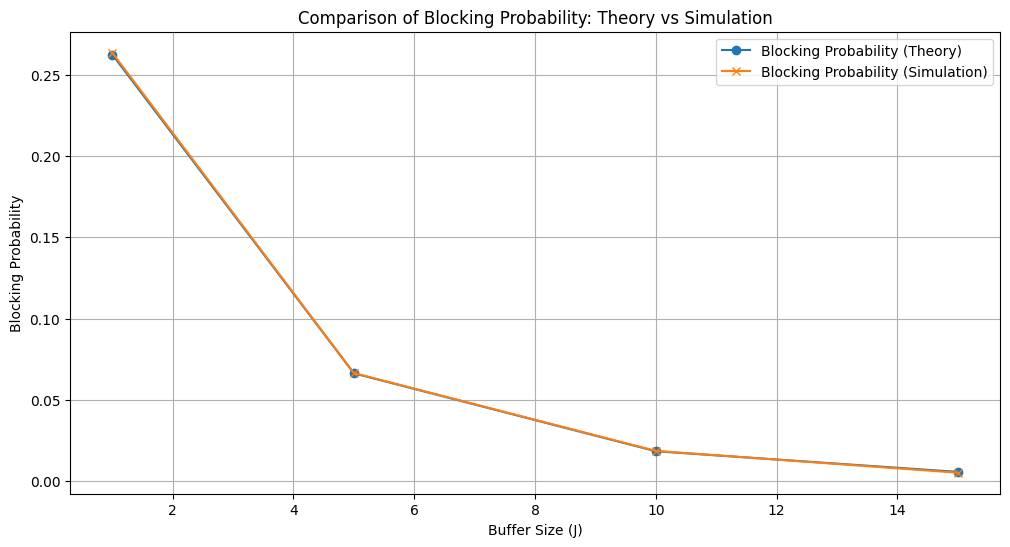

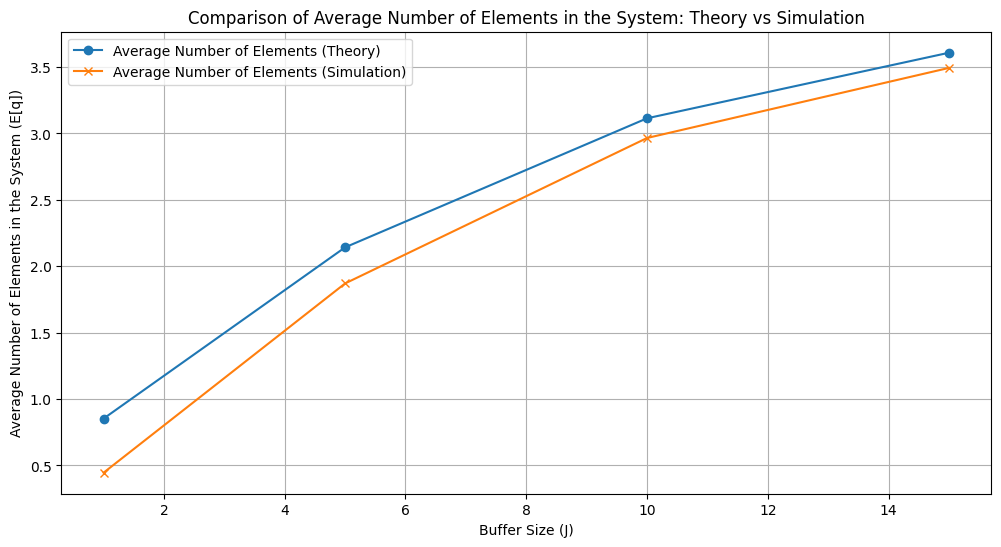

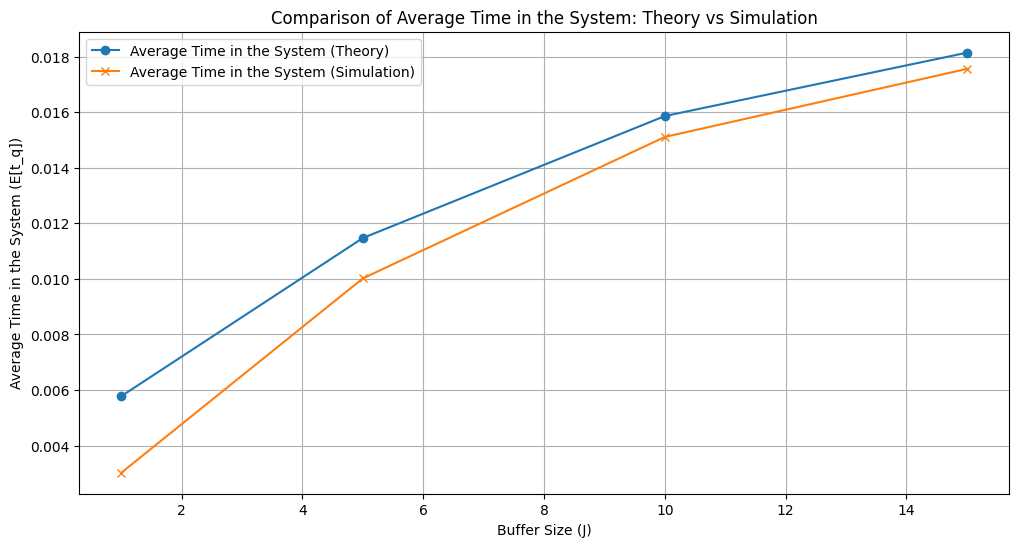

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_ = 200  # Arrival rate (packets per second)
mu = 250  # Service rate (packets per second)
buffer_sizes = [1, 5, 10, 15]  # Buffer sizes (positions)
num_iterations = int(1e6)  # Number of iterations for the simulation

# Arrays to store results
Pb_sim = np.zeros(len(buffer_sizes))  # Blocking probability (simulation)
E_q_sim = np.zeros(len(buffer_sizes))  # Average number of elements in the system (simulation)
E_tq_sim = np.zeros(len(buffer_sizes))  # Average time in the system (simulation)

Pb_theory = np.zeros(len(buffer_sizes))  # Blocking probability (theory)
E_q_theory = np.zeros(len(buffer_sizes))  # Average number of elements in the system (theory)
E_tq_theory = np.zeros(len(buffer_sizes))  # Average time in the system (theory)

# Simulation
for index, J in enumerate(buffer_sizes):
    N = J + 1  # Total capacity (server + buffer)
    rho = lambda_ / mu

    # Theoretical calculations
    Pb_theory[index] = (rho ** N) * (1 - rho) / (1 - rho ** (N + 1))
    E_q_theory[index] = (rho / (1 - rho)) - ((N + 1) * (rho ** (N + 1))) / (1 - rho ** (N + 1))
    E_tq_theory[index] = E_q_theory[index] / ((1 - Pb_theory[index]) * lambda_)

    # Simulation initialization
    t = 0  # Current time
    lq = 0  # Queue length
    ls = 0  # Server busy flag (0 if idle, 1 if busy)
    num_arrivals = 0  # Total number of arrivals
    num_departures = 0  # Total number of departures
    num_blocked = 0  # Total number of blocked packets
    arrival_times = []  # Arrival times
    total_elements = 0  # Total number of elements in the system at each step

    # Generate initial arrival time
    next_arrival = np.random.exponential(1 / lambda_)
    next_departure = float('inf')  # No departure initially

    while num_departures < num_iterations:
        t = min(next_arrival, next_departure)  # Advance time to the next event

        if next_arrival < next_departure:  # Arrival event
            num_arrivals += 1
            if ls == 1:
                if lq < J:  # Check if buffer has space
                    lq += 1  # Increment queue length
                    arrival_times.append(t)  # Record arrival time
                else:
                    num_blocked += 1  # Increment blocked packets count
            else:
                ls = 1  # Set server to busy
                next_departure = t + np.random.exponential(1 / mu)  # Schedule next departure
                arrival_times.append(t)  # Record arrival time

            next_arrival = t + np.random.exponential(1 / lambda_)  # Schedule next arrival
        else:  # Departure event
            num_departures += 1
            if lq > 0:
                lq -= 1  # Decrement queue length
                next_departure = t + np.random.exponential(1 / mu)  # Schedule next departure
            else:
                ls = 0  # Set server to idle
                next_departure = float('inf')  # No departure scheduled

            total_elements += (ls + lq)  # Add current elements in the system

            if len(arrival_times) > 0:
                arrival_times.pop(0)  # Remove the first arrival time

    # Simulation results
    Pb_sim[index] = num_blocked / num_arrivals
    E_q_sim[index] = total_elements / num_iterations
    E_tq_sim[index] = E_q_sim[index] / ((1 - Pb_sim[index]) * lambda_)

# Compare simulation and theoretical results
print("Buffer Size | Blocking Probability (Theory) | Blocking Probability (Simulation) | Average Elements (Theory) | Average Elements (Simulation) | Average Time (Theory) | Average Time (Simulation)")
for i, J in enumerate(buffer_sizes):
    print(f"{J:11d} | {Pb_theory[i]:29.5f} | {Pb_sim[i]:33.5f} | {E_q_theory[i]:21.5f} | {E_q_sim[i]:27.5f} | {E_tq_theory[i]:16.5f} | {E_tq_sim[i]:21.5f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(buffer_sizes, Pb_theory, 'o-', label='Blocking Probability (Theory)')
plt.plot(buffer_sizes, Pb_sim, 'x-', label='Blocking Probability (Simulation)')
plt.xlabel('Buffer Size (J)')
plt.ylabel('Blocking Probability')
plt.legend()
plt.grid(True)
plt.title('Comparison of Blocking Probability: Theory vs Simulation')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(buffer_sizes, E_q_theory, 'o-', label='Average Number of Elements (Theory)')
plt.plot(buffer_sizes, E_q_sim, 'x-', label='Average Number of Elements (Simulation)')
plt.xlabel('Buffer Size (J)')
plt.ylabel('Average Number of Elements in the System (E[q])')
plt.legend()
plt.grid(True)
plt.title('Comparison of Average Number of Elements in the System: Theory vs Simulation')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(buffer_sizes, E_tq_theory, 'o-', label='Average Time in the System (Theory)')
plt.plot(buffer_sizes, E_tq_sim, 'x-', label='Average Time in the System (Simulation)')
plt.xlabel('Buffer Size (J)')
plt.ylabel('Average Time in the System (E[t_q])')
plt.legend()
plt.grid(True)
plt.title('Comparison of Average Time in the System: Theory vs Simulation')
plt.show()

